In [8]:

import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

In [9]:
data_path = r'/Users/mohammadrezaghassemzadeh/Desktop/p-matching/product-matching/amazondata_datenbereinigt.xlsx'
data = pd.read_excel(data_path)

In [10]:
#benötigte Zeilen in einem  liste packen
separator = " | "  # Trennzeichen
sentences_a = data.apply(lambda row: separator.join(row[col] for col in ['NAME', 'DESCRIPTION'] if not pd.isna(row[col])), axis=1).tolist()


In [11]:
columns = []
sentences_b = data.apply(lambda row: separator.join(row[col] for col in columns 
                                                    if not pd.isna(row[col])), axis=1).tolist()

In [12]:

# Laden eines vortrainierten Modells
model = SentenceTransformer('all-MiniLM-L6-v2')

# Erzeugen der Embeddings, jedes Wort ist nun in eine Vektor geschrieben
embeddings_dataset_a = model.encode(sentences_a)
#embeddings_dataset_b = model.encode(sentences_b)



README.md: 100%|██████████| 10.7k/10.7k [00:00<00:00, 1.50MB/s]


In [13]:

print(embeddings_dataset_a)

[[ 0.01845033  0.05866143  0.00674716 ... -0.09264902 -0.03328229
   0.07121012]
 [-0.07354006 -0.00286697 -0.00216073 ... -0.00563142  0.03059844
   0.01734714]
 [-0.1197658   0.01505608 -0.03606212 ... -0.12266558  0.02439548
  -0.01645985]
 ...
 [-0.0907079  -0.00328471 -0.01745022 ... -0.12686066  0.01874756
   0.00274021]
 [-0.08911591  0.01474589 -0.00944037 ... -0.12036609  0.01905745
   0.01683285]
 [-0.08270445  0.00757166 -0.00435248 ... -0.11036351  0.0171259
   0.01297404]]


In [14]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# Diemensionsreduktion zu veranscahulischung 
tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(embeddings_dataset_a)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/mohammadrezaghassemzadeh/Desktop/p-matching/product-matching/bachelorarbeit/lib/python3.9/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


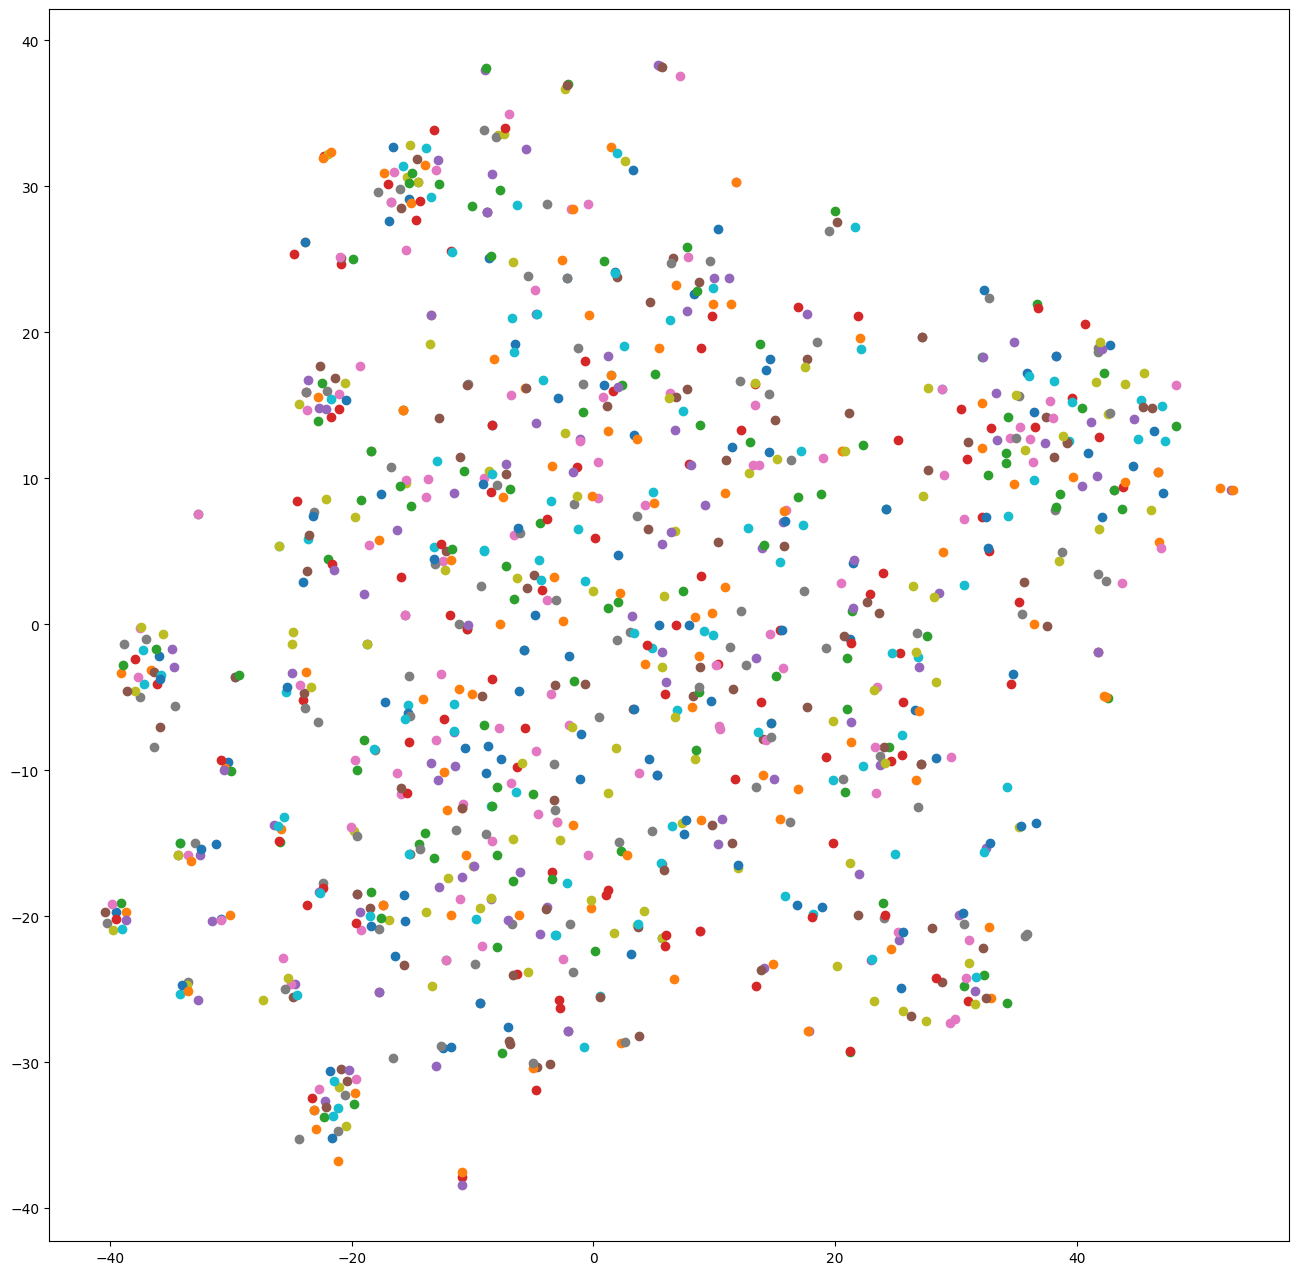

In [15]:
# Visualisierung
plt.figure(figsize=(16, 16))  # Eine vernünftige Größe wählen
for i, sentence in enumerate(sentences_a):
    x, y = embeddings_2d[i, :]
    plt.scatter(x, y)
    # if i % 10 == 0:  # Nur jedes 10. Label plotten, um Überlappung zu reduzieren
    #     plt.annotate(sentence, (x, y), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()

In [16]:
from sklearn.cluster import KMeans
# Hier sollte erstaml die daten in Clsutern geteilt werden, 
# Anzahl Cluster
n_clusters = 6

# K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(embeddings_dataset_a)
cluster_labels = kmeans.labels_


In [17]:
from sklearn.neighbors import NearestNeighbors

# Nächste Nachbarn für jeden Cluster finden
nearest_neighbors = NearestNeighbors(n_neighbors=4, algorithm='ball_tree')
nearest_neighbors.fit(embeddings_dataset_a)

neighbors_within_cluster = {}
for cluster_id in range(n_clusters):
    # Indizes der Datenpunkte in diesem Cluster
    indices = np.where(cluster_labels == cluster_id)[0]
    
    # Nächste Nachbarn innerhalb des Clusters finden
    nearest_neighbors.fit(embeddings_dataset_a[indices, :])
    neighbors = nearest_neighbors.kneighbors(return_distance=False)
    
    # Speichern der Nachbarn für jeden Datenpunkt im Cluster
    for i, idx in enumerate(indices):
        neighbors_within_cluster[idx] = indices[neighbors[i]]


NameError: name 'np' is not defined

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Initialisieren des Nearest Neighbors Algorithmus
nn = NearestNeighbors(n_neighbors=4, algorithm='ball_tree')  # 5 nächste + der Punkt selbst

nn.fit(embeddings_dataset_a)

# Finde die fünf nächsten Nachbarn für jeden Punkt in Datensatz A
neighbours_a = nn.kneighbors(embeddings_dataset_a, return_distance=False)


In [ ]:
# t-SNE zur Reduzierung der Dimensionen auf 2D für die Visualisierung
tsne = TSNE(n_components=2, random_state=0)
embeddings_2d = tsne.fit_transform(embeddings_dataset_a)


In [ ]:
# Visualisierung
plt.figure(figsize=(16, 16))
colors = plt.cm.get_cmap('hsv', n_clusters)


/var/folders/ts/4_j3m5qs2wvgc9jjm_yb5p1h0000gn/T/ipykernel_52869/3867988835.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('hsv', n_clusters)


<Figure size 1600x1600 with 0 Axes>

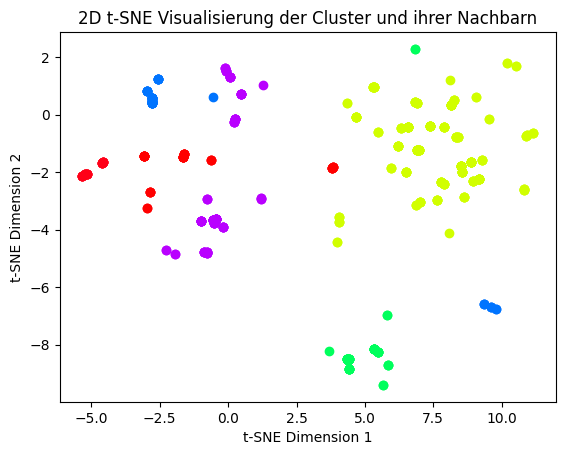

In [ ]:
for idx in neighbors_within_cluster:
    cluster_id = cluster_labels[idx]
    point_color = colors(cluster_id)
    plt.scatter(embeddings_2d[idx, 0], embeddings_2d[idx, 1], color=point_color)
    
    for neighbor_idx in neighbors_within_cluster[idx]:
        plt.scatter(embeddings_2d[neighbor_idx, 0], embeddings_2d[neighbor_idx, 1], color=point_color)

plt.title('2D t-SNE Visualisierung der Cluster und ihrer Nachbarn')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()